In [1]:
import numpy as np 
import pandas as pd
import scanpy as sc
import seaborn as sns

In [2]:
def saveWithPickle(obj, PATH_out, filename="saveWithPickle"):
    import pickle
    with open(f'{PATH_out}/{filename}.pickle', 'wb') as handle:
        pickle.dump(obj, handle, protocol=pickle.HIGHEST_PROTOCOL)

def loadFromPickle(dir_pickle):
    import pickle
    with open(dir_pickle, 'rb') as handle:
        unserialized_pickle = pickle.load(handle)
    return unserialized_pickle

## Marker genes

In [244]:
""" 
Endothelial cells
    https://www.biocompare.com/Editorial-Articles/598462-A-Guide-to-Endothelial-Cell-Markers/
    VWF, ACE, CD62P, ADAMTS13
    
    Google
    VWF, CDH5, PECAM1, ACE

Fibroblasts
    https://www.nature.com/articles/s41467-022-30633-9#Fig1 
    COL1A2, COL3A1, VIM, ADAMDEC1, DCN, SLIT2, CXCL12, F3, SOX6, WNT5A, WNT5B 
    
    https://www.nature.com/articles/s41467-020-17740-1 (expressed in fibrobasts but not pericytes!)
    PDGFRA, LUM
    
    https://doi.org/10.1016%2Fj.cell.2018.08.067
    COL3A1, DCN, THY1
    
CAF
    https://www.sciencedirect.com/science/article/pii/S0304383524003793#sec3
    NECTIN2 -> Exclusively expressed by Fibroblast, poor prognosis
    apCAF:  HLA-DRA, CD74
    myoCAF: MUSTN1, ACTA2
    iCAF:   IL6
    
Pericytes
    Google: PDGFRB, CSPG4, ACTA2, DES, 
    
    https://www.nature.com/articles/s41467-020-17740-1 (expressed in pericytes but not fibroblasts!)
    RGS5, PDGFRB, ACTA2, COL1A1
    
"""

Stromal_markers = {
    'Endothelial' : ['VWF', 'CDH5', 'ACE', 'PECAM1'], # SELP = CD62P
    'Fibroblast' : ['COL1A2', 'COL3A1', 'VIM', 'ADAMDEC1', 'DCN', 'SLIT2', 'CXCL12', 'F3', 'SOX6', 'PDGFRA' ],
    # 'CAF' : ['ACTA2', 'PDGFRB', 'NECTIN2', ],
    # 'apCAF' : ['HLA-DRA', 'CD74'],
    # 'myoCAF' : ['MUSTN1', 'ACTA2'],
    # 'iCAF' : ['IL6'],
    'Pericyte' : ['CSPG4', 'RGS5', 'COL1A1', 'PDGFRB', 'ACTA2', 'DES'], # CSPG4 = NG2
}

## Load data

In [3]:
adata_chen_TME = sc.read_h5ad('/node200data/18parkky/datasets/data/public/processed_data/Immunotherapy_CRC_Chen_et_al/2_cell_type_labeled_h5ad/TME_annot_temp_files/Chen.MSI.preprocessed.NanoMnT.nonTumor.preAnnot.h5ad')

In [4]:
dict_Identifier_to_lvl_1_CellType = dict()
dict_Identifier_to_lvl_2_CellType = dict()

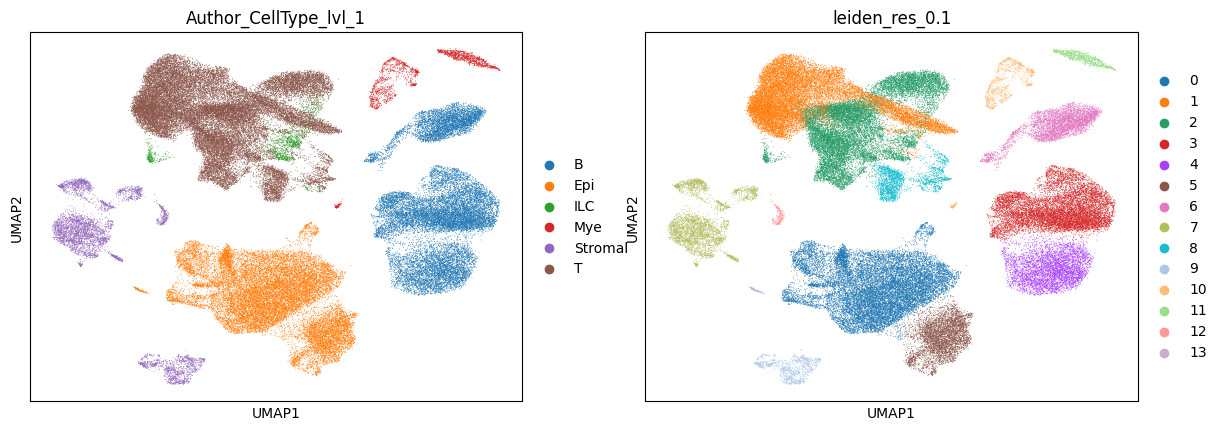

In [5]:
sc.pl.umap(adata_chen_TME, color=['Author_CellType_lvl_1', 'leiden_res_0.1'])

## Stromal cells

In [137]:
adata_chen_sml = adata_chen_TME[adata_chen_TME.obs['leiden_res_0.1'].isin(['7', '9', '12',])].copy()
adata_chen_sml = adata_chen_sml.raw.to_adata()

In [138]:
sc.pp.normalize_total(adata_chen_sml)
sc.pp.log1p(adata_chen_sml)
sc.pp.highly_variable_genes(adata_chen_sml, n_top_genes=2000, batch_key="SampleID")

adata_chen_sml.raw = adata_chen_sml.copy()
adata_chen_sml = adata_chen_sml[:, adata_chen_sml.var.highly_variable]

sc.pp.scale(adata_chen_sml, max_value=10)
sc.tl.pca(adata_chen_sml, svd_solver="arpack")

sc.pp.neighbors(adata_chen_sml, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata_chen_sml, random_state=42)

/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/preprocessing/_scale.py:316: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


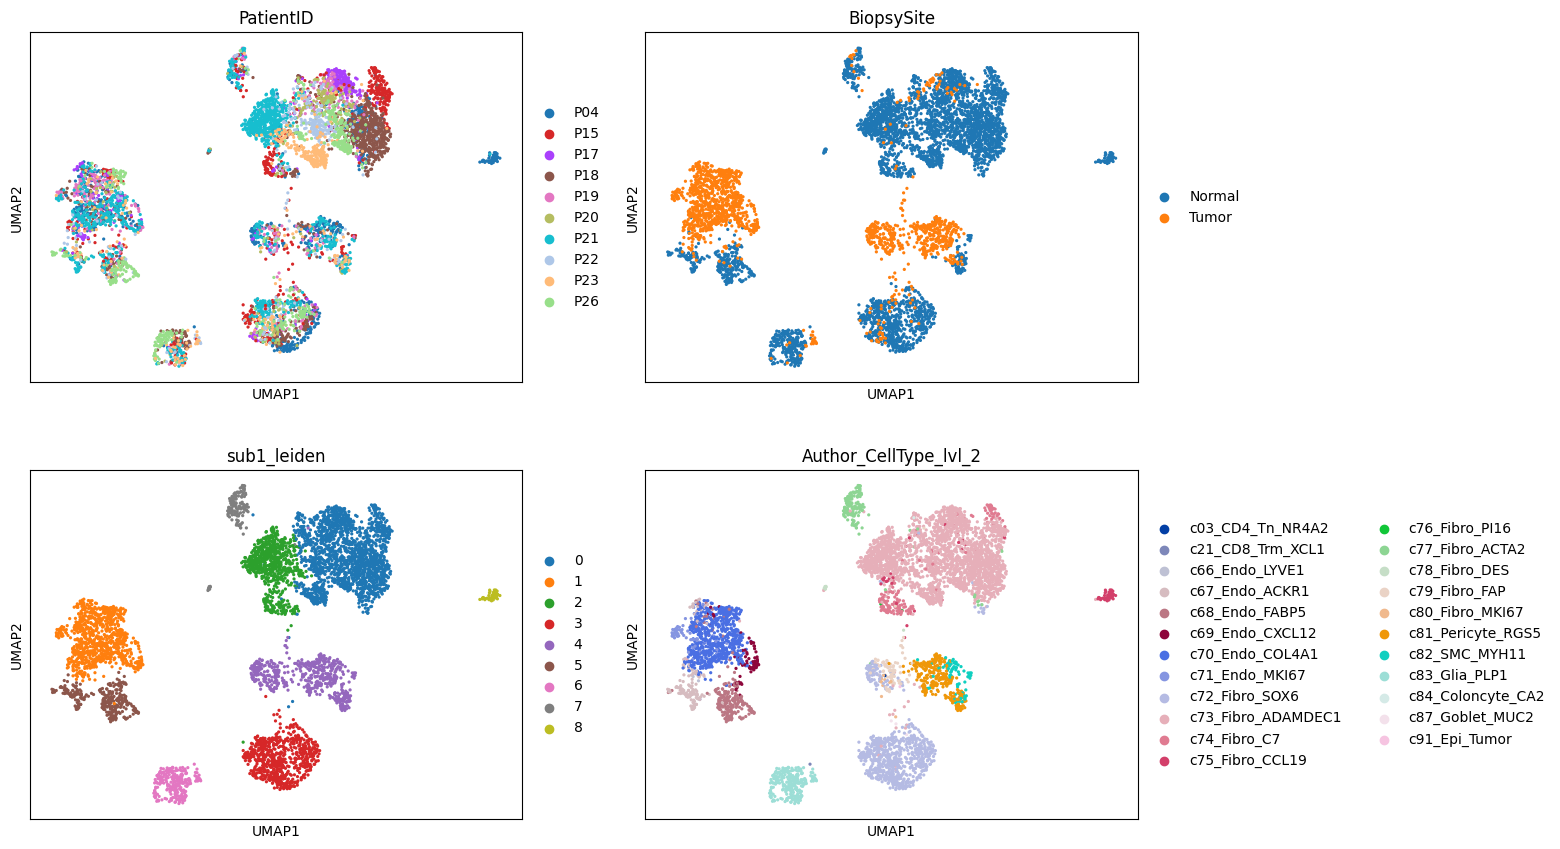

In [139]:
sc.tl.leiden(adata_chen_sml, resolution=0.2, key_added='sub1_leiden')
sc.pl.umap(adata_chen_sml, color=['PatientID', 'BiopsySite', 'sub1_leiden', 'Author_CellType_lvl_2'], ncols=2)

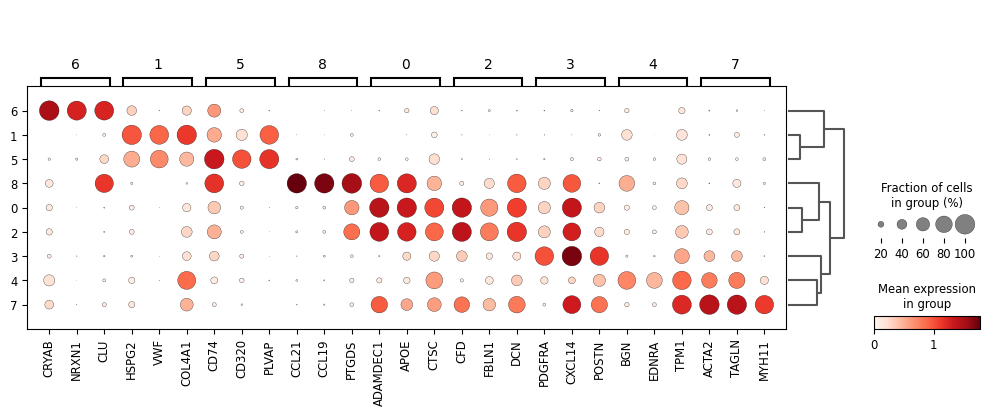

In [141]:
sc.tl.rank_genes_groups(adata_chen_sml, groupby='sub1_leiden', method='wilcoxon')
sc.pl.rank_genes_groups_dotplot(adata_chen_sml, n_genes=3, groupby='sub1_leiden')

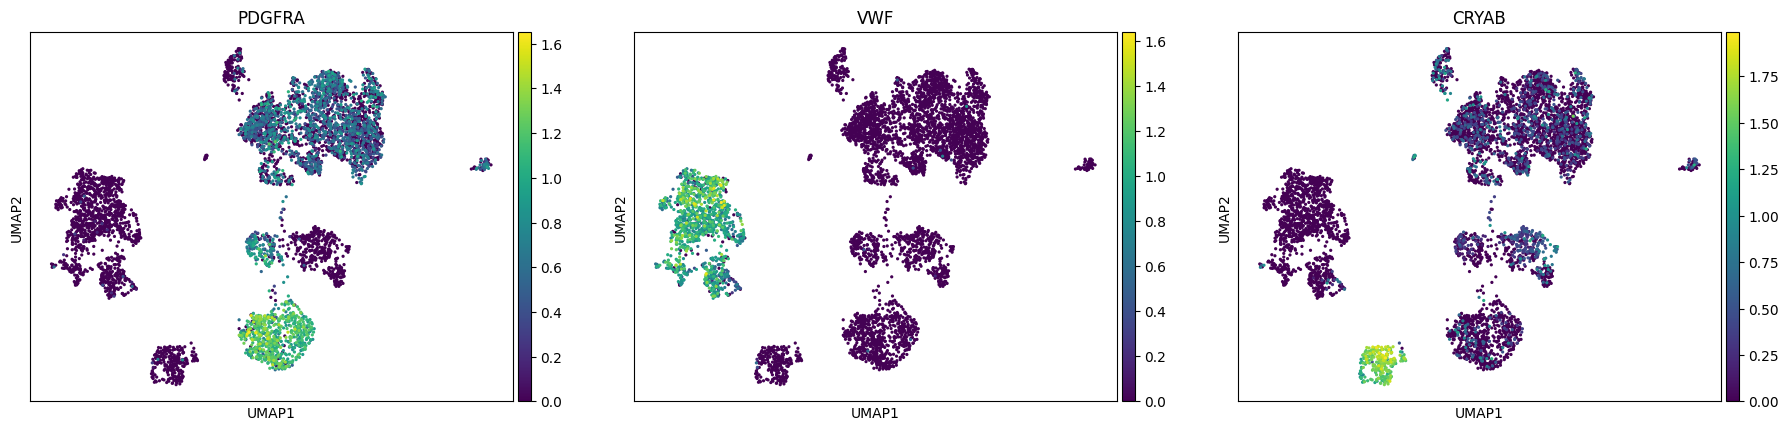

In [199]:
sc.pl.umap(adata_chen_sml, color=['PDGFRA', 'VWF', 'CRYAB'], ncols=3)

### leiden 1, 5 → Endothelial

In [174]:
adata_chen_sml_l1 = adata_chen_sml[adata_chen_sml.obs['sub1_leiden'].isin(['1', '5'])].copy()
adata_chen_sml_l1 = adata_chen_sml_l1.raw.to_adata()

sc.pp.normalize_total(adata_chen_sml_l1)
sc.pp.log1p(adata_chen_sml_l1)
sc.pp.highly_variable_genes(adata_chen_sml_l1, n_top_genes=2000, batch_key="SampleID")

adata_chen_sml_l1.raw = adata_chen_sml_l1.copy()
adata_chen_sml_l1 = adata_chen_sml_l1[:, adata_chen_sml_l1.var.highly_variable]

sc.pp.scale(adata_chen_sml_l1, max_value=10)
sc.tl.pca(adata_chen_sml_l1, svd_solver="arpack")

sc.pp.neighbors(adata_chen_sml_l1, n_neighbors=15, n_pcs=40)
sc.tl.umap(adata_chen_sml_l1, random_state=42)

sc.tl.rank_genes_groups(adata_chen_sml_l1, groupby='sub1_leiden', method='wilcoxon')

/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/preprocessing/_scale.py:316: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


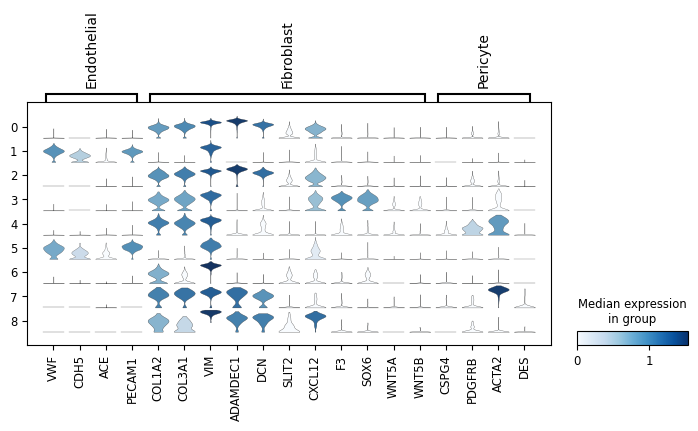

In [239]:
# Confirming endothelial identity when compared to other clusters
sc.pl.stacked_violin(adata_chen_sml, var_names=Stromal_markers, groupby='sub1_leiden')

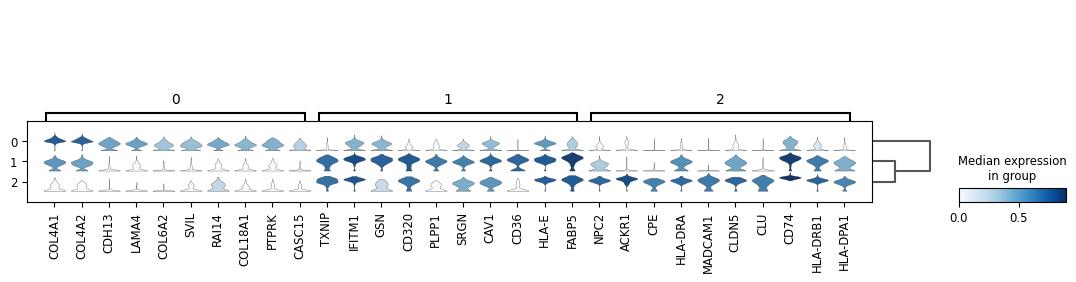

In [183]:
sc.tl.leiden(adata_chen_sml_l1, resolution=0.2, key_added='sub2_leiden')
sc.tl.rank_genes_groups(adata_chen_sml_l1, groupby='sub2_leiden', method='wilcoxon')
sc.pl.rank_genes_groups_stacked_violin(adata_chen_sml_l1, groupby='sub2_leiden')

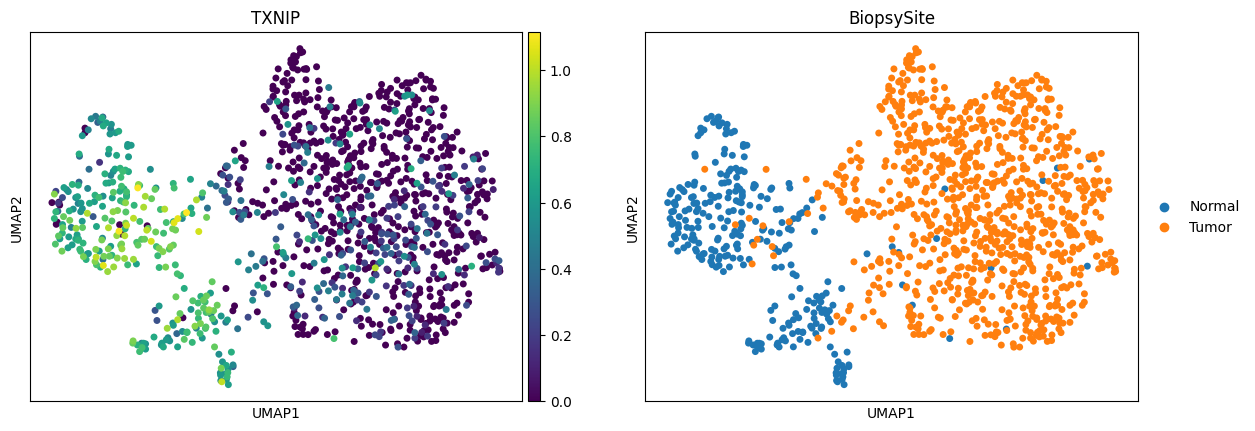

In [195]:
sc.pl.umap(adata_chen_sml_l1, color=['TXNIP', 'BiopsySite'])

In [192]:
for tup in adata_chen_sml_l1.obs.itertuples():
    if tup.sub2_leiden=='0':
        dict_Identifier_to_lvl_1_CellType[tup.Identifier] = 'Endothelial'
        dict_Identifier_to_lvl_2_CellType[tup.Identifier] = 'TXNIP-low Endothelial'
    else:
        dict_Identifier_to_lvl_1_CellType[tup.Identifier] = 'Endothelial'
        dict_Identifier_to_lvl_2_CellType[tup.Identifier] = 'TXNIP-high Endothelial'

### leiden 6 → Glial cells

In [124]:
for tup in adata_chen_sml[adata_chen_sml.obs['sub1_leiden'].isin(['6'])].obs.itertuples():
    dict_Identifier_to_lvl_1_CellType[tup.Identifier] = 'Glial'
    dict_Identifier_to_lvl_2_CellType[tup.Identifier] = 'Glial'

### leiden 8 → CCL21+ Fibroblast

In [122]:
for tup in adata_chen_sml[adata_chen_sml.obs['sub1_leiden'].isin(['9'])].obs.itertuples():
    dict_Identifier_to_lvl_1_CellType[tup.Identifier] = 'Fibroblast'
    dict_Identifier_to_lvl_2_CellType[tup.Identifier] = 'CCL21+ Fibroblast'

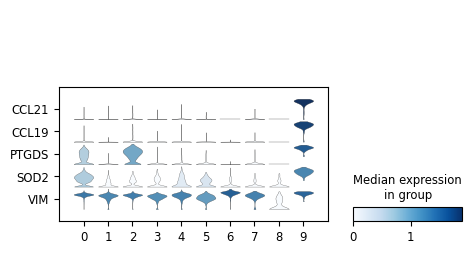

In [121]:
sc.pl.stacked_violin(adata_chen_sml, var_names=['CCL21', 'CCL19', 'PTGDS','SOD2', 'VIM'], groupby='sub1_leiden', swap_axes=True)

### Subcluster other leidens

In [200]:
adata_chen_sml_subset = adata_chen_sml[~(adata_chen_sml.obs['sub1_leiden'].isin(['1', '5', '6', '8']))].copy()
adata_chen_sml_subset = adata_chen_sml_subset.raw.to_adata()

sc.pp.normalize_total(adata_chen_sml_subset)
sc.pp.log1p(adata_chen_sml_subset)
sc.pp.highly_variable_genes(adata_chen_sml_subset, n_top_genes=2000, batch_key="SampleID")

adata_chen_sml_subset.raw = adata_chen_sml_subset.copy()
adata_chen_sml_subset = adata_chen_sml_subset[:, adata_chen_sml_subset.var.highly_variable]

sc.pp.scale(adata_chen_sml_subset, max_value=10)
sc.tl.pca(adata_chen_sml_subset, svd_solver="arpack")

sc.pp.neighbors(adata_chen_sml_subset, n_neighbors=15, n_pcs=40)
sc.tl.umap(adata_chen_sml_subset, random_state=42)

sc.tl.leiden(adata_chen_sml_subset, resolution=0.2, key_added='sub2_leiden')
sc.tl.rank_genes_groups(adata_chen_sml_subset, groupby='sub2_leiden', method='wilcoxon')

/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/preprocessing/_scale.py:316: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


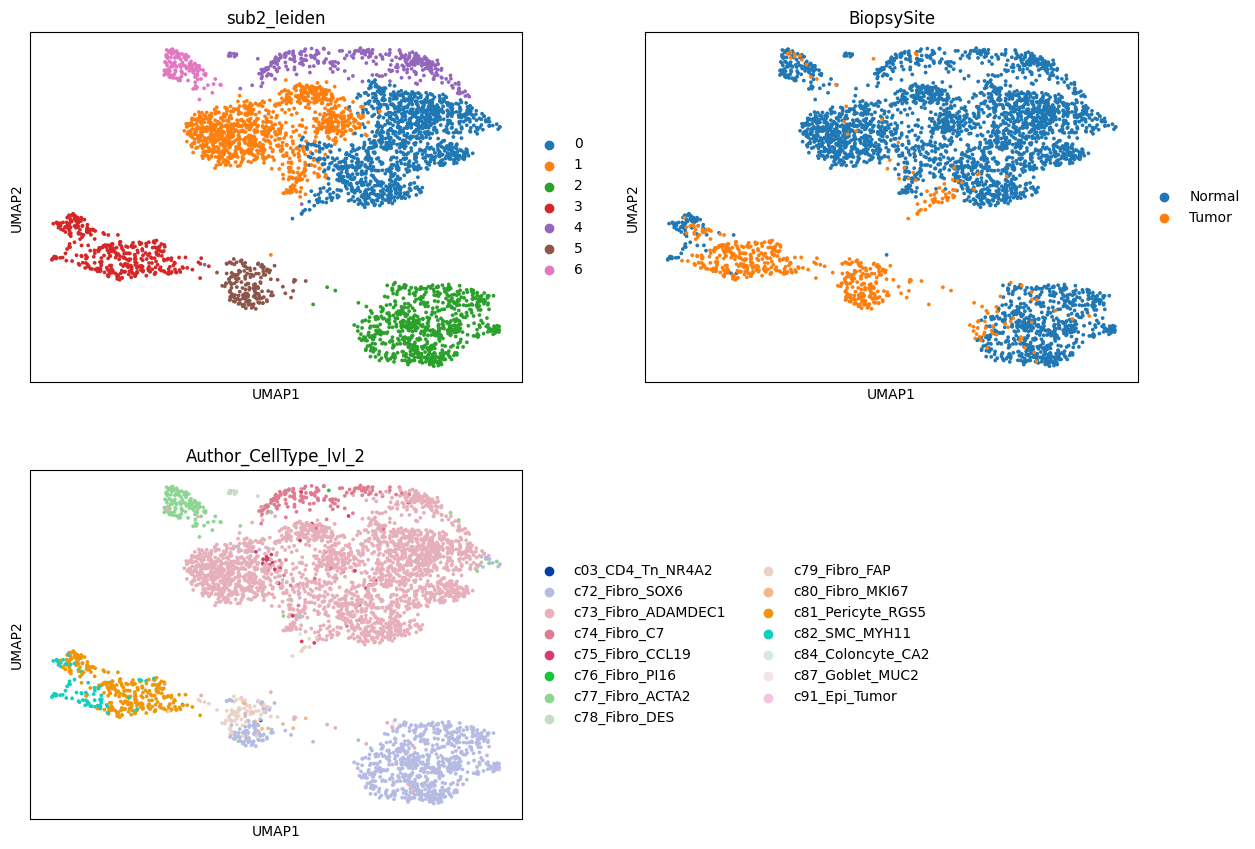

In [233]:
sc.pl.umap(adata_chen_sml_subset, color=['sub2_leiden', 'BiopsySite', 'Author_CellType_lvl_2'], ncols=2)

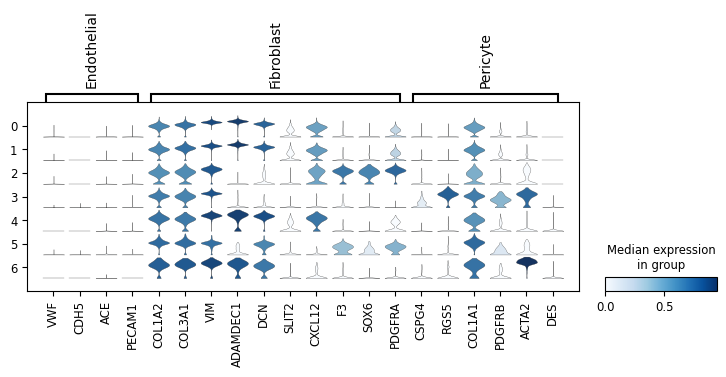

In [255]:
sc.pl.stacked_violin(adata_chen_sml_subset, var_names=Stromal_markers, groupby='sub2_leiden', )

#### leiden [0,2,3,4,7]-2 → SOX6+ Fibroblast

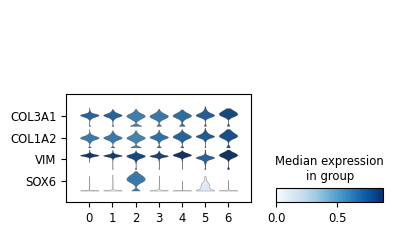

In [253]:
sc.pl.stacked_violin(adata_chen_sml_subset, var_names=['COL3A1', 'COL1A2', 'VIM', 'SOX6'], groupby='sub2_leiden', swap_axes=True)

In [237]:
for tup in adata_chen_sml_subset[adata_chen_sml_subset.obs['sub2_leiden'].isin(['2'])].obs.itertuples():
    dict_Identifier_to_lvl_1_CellType[tup.Identifier] = 'Fibroblast'
    dict_Identifier_to_lvl_2_CellType[tup.Identifier] = 'SOX6+ Fibroblast'

#### leiden [0,2,3,4,7]-3 → Pericyte

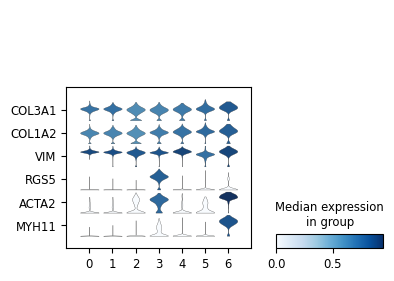

In [260]:
sc.pl.stacked_violin(adata_chen_sml_subset, var_names=['COL3A1', 'COL1A2', 'VIM', 'RGS5', 'ACTA2', 'MYH11'], groupby='sub2_leiden', swap_axes=True)

In [247]:
# Strong RGS5 and other pericyte enriched gene expression
for tup in adata_chen_sml_subset[adata_chen_sml_subset.obs['sub2_leiden'].isin(['3'])].obs.itertuples():
    dict_Identifier_to_lvl_1_CellType[tup.Identifier] = 'Pericyte'
    dict_Identifier_to_lvl_2_CellType[tup.Identifier] = 'Pericyte'

#### leiden [0,2,3,4,7]-5 → CXCL12- Fibroblast

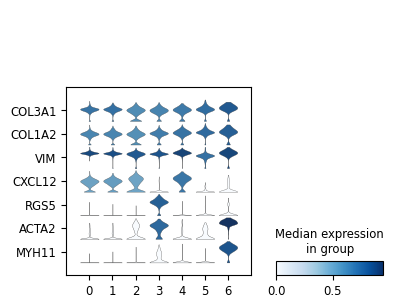

In [261]:
sc.pl.stacked_violin(adata_chen_sml_subset, var_names=['COL3A1', 'COL1A2', 'VIM', 'CXCL12', 'RGS5', 'ACTA2', 'MYH11'], groupby='sub2_leiden', swap_axes=True)

In [259]:
# Strong RGS5 and other pericyte enriched gene expression
for tup in adata_chen_sml_subset[adata_chen_sml_subset.obs['sub2_leiden'].isin(['5'])].obs.itertuples():
    dict_Identifier_to_lvl_1_CellType[tup.Identifier] = 'Fibroblast'
    dict_Identifier_to_lvl_2_CellType[tup.Identifier] = 'CXCL12- Fibroblast'

#### leiden [0,2,3,4,7]-6 → SMC

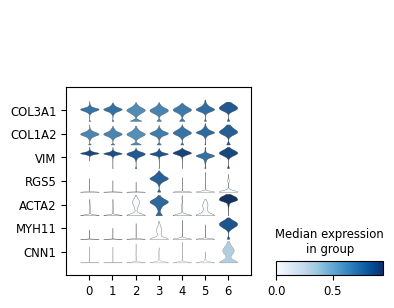

In [265]:
sc.pl.stacked_violin(adata_chen_sml_subset, var_names=['COL3A1', 'COL1A2', 'VIM', 'RGS5', 'ACTA2', 'MYH11', 'CNN1'], groupby='sub2_leiden', swap_axes=True)

In [266]:
# Strong MYH11 and CNN1 expression
for tup in adata_chen_sml_subset[adata_chen_sml_subset.obs['sub2_leiden'].isin(['6'])].obs.itertuples():
    dict_Identifier_to_lvl_1_CellType[tup.Identifier] = 'SMC'
    dict_Identifier_to_lvl_2_CellType[tup.Identifier] = 'SMC'

#### leiden [0,2,3,4,7]-0,1,4 → CXCL12+ Fibroblast

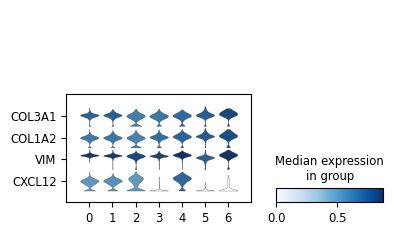

In [267]:
sc.pl.stacked_violin(adata_chen_sml_subset, var_names=['COL3A1', 'COL1A2', 'VIM', 'CXCL12', ], groupby='sub2_leiden', swap_axes=True)

In [270]:
adata_chen_sml_subset_subset = adata_chen_sml_subset[(adata_chen_sml_subset.obs['sub2_leiden'].isin(['0', '1', '4']))].copy()
adata_chen_sml_subset_subset = adata_chen_sml_subset_subset.raw.to_adata()

temp = list()
for SampleID, edf in adata_chen_sml_subset_subset.obs.groupby('SampleID'):
    if len(edf) <= 1:
        print(SampleID, len(edf))
        temp.append( SampleID )
        dict_Identifier_to_lvl_1_CellType[edf.iloc[0].Identifier] = 'Epithelial'
        dict_Identifier_to_lvl_2_CellType[edf.iloc[0].Identifier] = 'N/A'

adata_chen_sml_subset_subset = adata_chen_sml_subset_subset[~(adata_chen_sml_subset_subset.obs['SampleID'].isin(temp))].copy()

sc.pp.normalize_total(adata_chen_sml_subset_subset)
sc.pp.log1p(adata_chen_sml_subset_subset)
sc.pp.highly_variable_genes(adata_chen_sml_subset_subset, n_top_genes=2000, batch_key="SampleID")

adata_chen_sml_subset_subset.raw = adata_chen_sml_subset_subset.copy()
adata_chen_sml_subset_subset = adata_chen_sml_subset_subset[:, adata_chen_sml_subset_subset.var.highly_variable]

sc.pp.scale(adata_chen_sml_subset_subset, max_value=10)
sc.tl.pca(adata_chen_sml_subset_subset, svd_solver="arpack")

sc.pp.neighbors(adata_chen_sml_subset_subset, n_neighbors=15, n_pcs=40)
sc.tl.umap(adata_chen_sml_subset_subset, random_state=42)

sc.tl.leiden(adata_chen_sml_subset_subset, resolution=0.2, key_added='sub3_leiden')
sc.tl.rank_genes_groups(adata_chen_sml_subset_subset, groupby='sub3_leiden', method='wilcoxon')

P18-T-I 1


/tmp/ipykernel_297699/1977077100.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for SampleID, edf in adata_chen_sml_subset_subset.obs.groupby('SampleID'):
/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/preprocessing/_scale.py:316: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [271]:
sc.tl.leiden(adata_chen_sml_subset_subset, resolution=0.2, key_added='sub3_leiden')
sc.tl.rank_genes_groups(adata_chen_sml_subset_subset, groupby='sub3_leiden', method='wilcoxon')

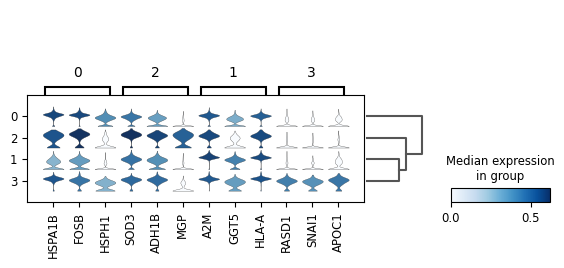

In [282]:
sc.pl.rank_genes_groups_stacked_violin(adata_chen_sml_subset_subset, n_genes=3, groupby='sub3_leiden', )

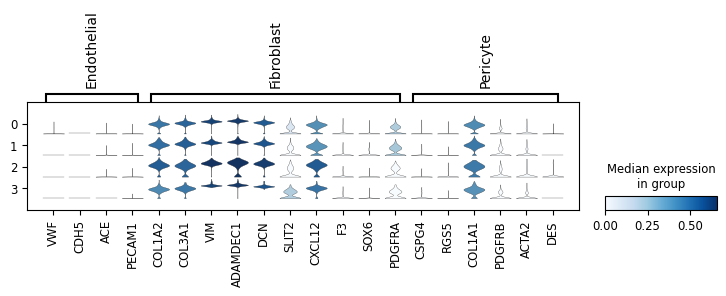

In [276]:
sc.pl.stacked_violin(adata_chen_sml_subset_subset, var_names=Stromal_markers, groupby='sub3_leiden', )

In [295]:
for tup in adata_chen_sml_subset_subset[adata_chen_sml_subset_subset.obs['sub2_leiden'].isin(['2'])].obs.itertuples():
    dict_Identifier_to_lvl_1_CellType[tup.Identifier] = 'Fibroblast'
    dict_Identifier_to_lvl_2_CellType[tup.Identifier] = 'MGP+ Fibroblast'
    
for tup in adata_chen_sml_subset_subset[~(adata_chen_sml_subset_subset.obs['sub2_leiden'].isin(['2']))].obs.itertuples():
    dict_Identifier_to_lvl_1_CellType[tup.Identifier] = 'Fibroblast'
    dict_Identifier_to_lvl_2_CellType[tup.Identifier] = 'Fibroblast'

In [297]:
saveWithPickle(dict_Identifier_to_lvl_1_CellType, '/node200data/18parkky/datasets/data/public/processed_data/Immunotherapy_CRC_Chen_et_al/2_cell_type_labeled_h5ad/dict_Identifier_to_CellType', 'Stromal.lvl1')
saveWithPickle(dict_Identifier_to_lvl_2_CellType, '/node200data/18parkky/datasets/data/public/processed_data/Immunotherapy_CRC_Chen_et_al/2_cell_type_labeled_h5ad/dict_Identifier_to_CellType', 'Stromal.lvl2')

## Label all TME cell types

In [299]:
dict_Identifier_to_lvl_1_CellType_1 = loadFromPickle('/node200data/18parkky/datasets/data/public/processed_data/Immunotherapy_CRC_Chen_et_al/2_cell_type_labeled_h5ad/dict_Identifier_to_CellType/B_and_T.lvl1.pickle')
dict_Identifier_to_lvl_1_CellType_2 = loadFromPickle('/node200data/18parkky/datasets/data/public/processed_data/Immunotherapy_CRC_Chen_et_al/2_cell_type_labeled_h5ad/dict_Identifier_to_CellType/Mye_and_Epi.lvl1.pickle')
dict_Identifier_to_lvl_1_CellType_3 = loadFromPickle('/node200data/18parkky/datasets/data/public/processed_data/Immunotherapy_CRC_Chen_et_al/2_cell_type_labeled_h5ad/dict_Identifier_to_CellType/Stromal.lvl1.pickle')

dict_Identifier_to_lvl_2_CellType_1 = loadFromPickle('/node200data/18parkky/datasets/data/public/processed_data/Immunotherapy_CRC_Chen_et_al/2_cell_type_labeled_h5ad/dict_Identifier_to_CellType/B_and_T.lvl2.pickle')
dict_Identifier_to_lvl_2_CellType_2 = loadFromPickle('/node200data/18parkky/datasets/data/public/processed_data/Immunotherapy_CRC_Chen_et_al/2_cell_type_labeled_h5ad/dict_Identifier_to_CellType/Mye_and_Epi.lvl2.pickle')
dict_Identifier_to_lvl_2_CellType_3 = loadFromPickle('/node200data/18parkky/datasets/data/public/processed_data/Immunotherapy_CRC_Chen_et_al/2_cell_type_labeled_h5ad/dict_Identifier_to_CellType/Stromal.lvl2.pickle')

dict_Identifier_to_lvl_1_CellType_Total,  dict_Identifier_to_lvl_2_CellType_Total = dict(), dict()

for k,v in dict_Identifier_to_lvl_1_CellType_1.items(): dict_Identifier_to_lvl_1_CellType_Total[k] = v
for k,v in dict_Identifier_to_lvl_1_CellType_2.items(): dict_Identifier_to_lvl_1_CellType_Total[k] = v
for k,v in dict_Identifier_to_lvl_1_CellType_3.items(): dict_Identifier_to_lvl_1_CellType_Total[k] = v

for k,v in dict_Identifier_to_lvl_2_CellType_1.items(): dict_Identifier_to_lvl_2_CellType_Total[k] = v
for k,v in dict_Identifier_to_lvl_2_CellType_2.items(): dict_Identifier_to_lvl_2_CellType_Total[k] = v
for k,v in dict_Identifier_to_lvl_2_CellType_3.items(): dict_Identifier_to_lvl_2_CellType_Total[k] = v

adata_chen_TME.obs['Manual_CellType_lvl_1'] = [ dict_Identifier_to_lvl_1_CellType_Total[Identifier] for Identifier in adata_chen_TME.obs['Identifier'] ]
adata_chen_TME.obs['Manual_CellType_lvl_2'] = [ dict_Identifier_to_lvl_2_CellType_Total[Identifier] for Identifier in adata_chen_TME.obs['Identifier'] ]

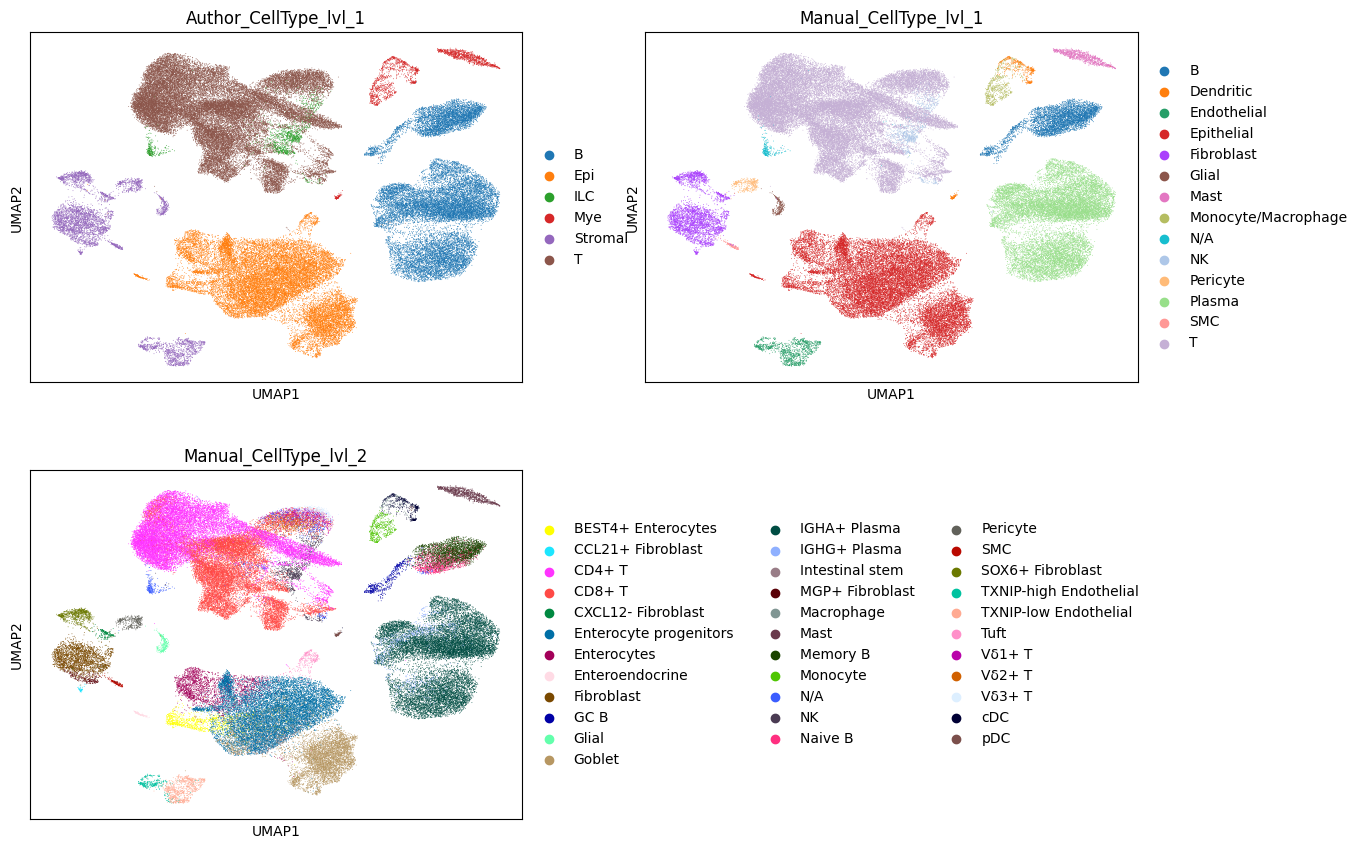

In [301]:
sc.pl.umap(adata_chen_TME, color=['Author_CellType_lvl_1', 'Manual_CellType_lvl_1', 'Manual_CellType_lvl_2'], ncols=2)

### Overview using shortened version of marker genes

In [334]:
B_markers = { 'B' : ['MS4A1', 'CD79A', 'CD19'], 
            'Naive' : ["IGHD", 'IGHM', ],
            'Memory B' : ['CD27', 'CD24'], 
            'GC' : ['MEF2B', 'MCM3', ], 
}

Plasma_markers = {
    'Plasma' : ['SDC1', 'MZB1', 'DERL3'],
}

B_markers_total = dict()
for k,v in B_markers.items(): B_markers_total[k] = v
for k,v in Plasma_markers.items(): B_markers_total[k] = v
B_markers_total['IgG+'] = [ 'IGHG1', ]
B_markers_total['IgA+'] = [ 'IGHA1', ]

T_markers = {
    'T' : ['CD3D', 'CD3E', ],
    'Naive T' : ['PTPRC', 'IL7R', 'CCR7', 'FOXP1', 'SELL',],
    'CD4+ T' : ['CD4', 'FOXP3'], 
    'CD8+ T' : ['CD8A','GZMK'],
    'NK' : ['KLRD1', 'NKG7'],
    'Vδ1+ T' : ['TRDV1',],
    'Vδ2+ T' : ['TRDV2',],
    'Vδ3+ T' : ['TRDV3',],
}

Myeloid_markers = { 
                   'Mast' :         ['MS4A2', 'TPSAB1', 'TPSB2', 'CPA3' ], 
                   'Monocytes' :    ['CD14', ],
                   'Neutrophils' :  [ 'FCGR3A'], 
                   'pDC' :          ["GZMB", "IL3RA", 'CLEC4C',],
                   'cDC' :          ['ITGAX', 'ID2', 'IRF4', 'LAMP3', 'ZBTB46'],
                   }

Epithelial_markers = { 
                         'Intestinal stem' : ['LGR5', 'ASCL2',], 
                         'Goblet' : ['MUC2', 'FCGBP', 'CLCA1', 'ZG16', ], 
                         'Enterocytes' : ['SLC26A3', 'CLCA4', 'BEST4', ], 
                         'Enterocyte progenitors' : ['CA2', 'SELENBP1'], 
                         'Enteroendocrine' : ['PCSK1N', ], 
                         'Tuft' : ['POU2F3',],}

Stromal_markers = {
    'Endothelial' : ['VWF', 'CDH5', 'PECAM1'], # SELP = CD62P
    'Fibroblast' : ['COL1A2', 'COL3A1', 'ADAMDEC1', 'DCN', ],
    'Pericyte' : ['CSPG4', 'RGS5', ], # CSPG4 = NG2
}

In [335]:
dict_marker_genes = dict()
for k,v in B_markers_total.items(): dict_marker_genes[k]=v
for k,v in T_markers.items(): dict_marker_genes[k]=v
for k,v in Myeloid_markers.items(): dict_marker_genes[k]=v
for k,v in Epithelial_markers.items(): dict_marker_genes[k]=v
for k,v in Stromal_markers.items(): dict_marker_genes[k]=v
len(dict_marker_genes)

29

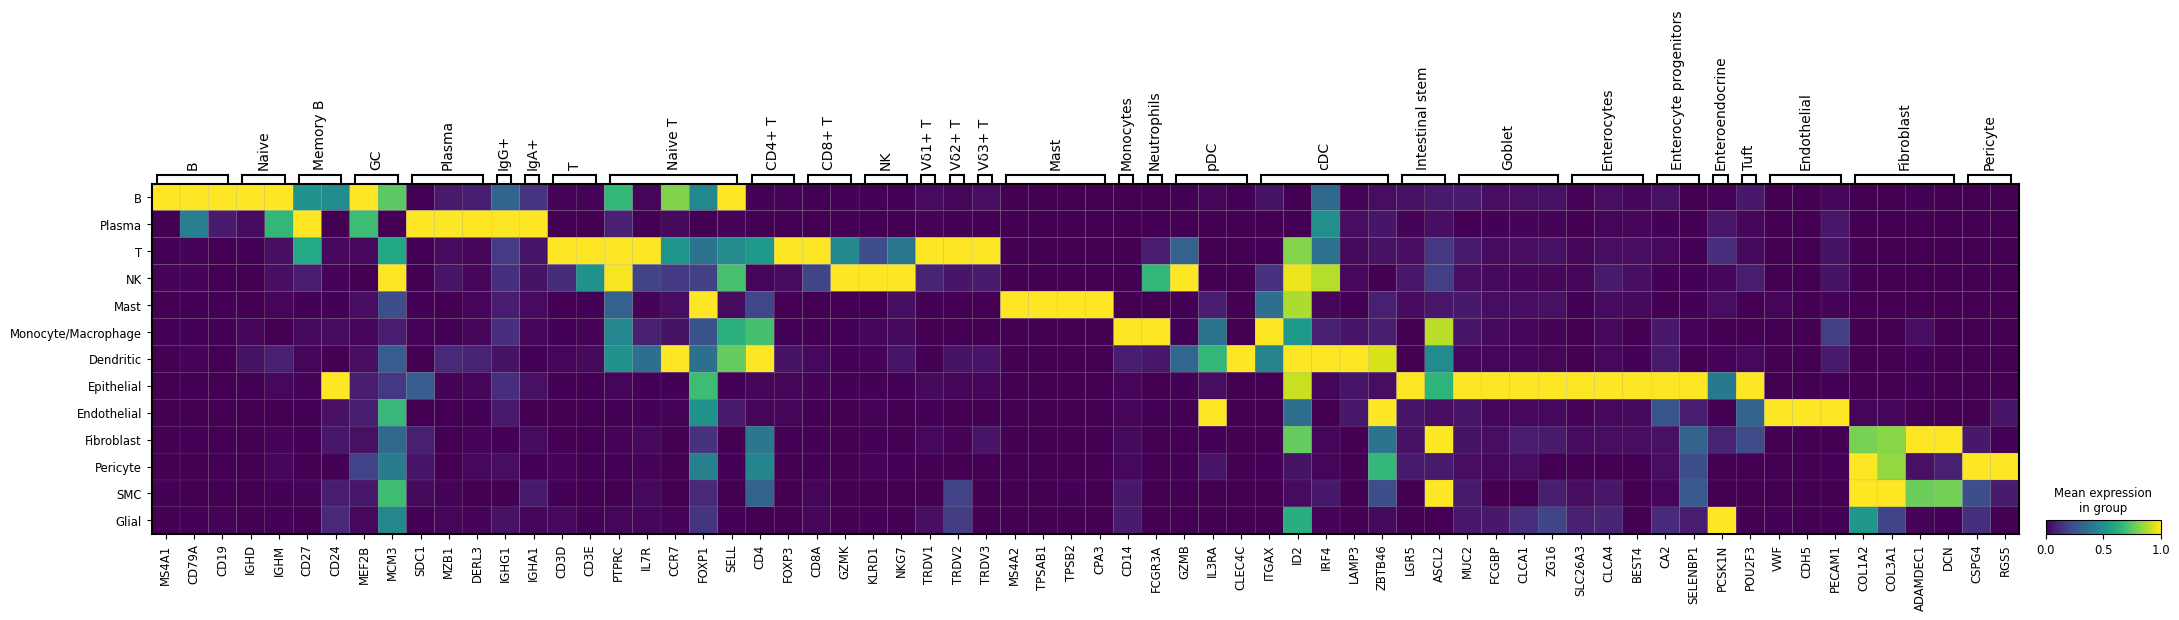

In [336]:
sc.pl.matrixplot(adata_chen_TME[adata_chen_TME.obs['Manual_CellType_lvl_2']!='N/A'], var_names=dict_marker_genes, groupby='Manual_CellType_lvl_1', swap_axes=False, standard_scale='var', 
                 categories_order=['B', 'Plasma', 'T', 'NK', 'Mast', 'Monocyte/Macrophage', 'Dendritic', 'Epithelial', 'Endothelial', 'Fibroblast', 'Pericyte',  'SMC', 'Glial']
                 )

In [376]:
adata_chen_TME.write('/node200data/18parkky/datasets/data/public/processed_data/Immunotherapy_CRC_Chen_et_al/2_cell_type_labeled_h5ad/Chen.MSI.preprocessed.NanoMnT.ManualAnnot.TME.h5ad')

In [ ]:
adata_chen = sc.read_h5ad('/node200data/18parkky/datasets/data/public/processed_data/Immunotherapy_CRC_Chen_et_al/2_cell_type_labeled_h5ad/Chen.MSI.preprocessed.NanoMnT.ManualAnnot.h5ad')

In [385]:
temp = list()
for tup in adata_chen.obs.itertuples():
    if tup.Manual_CellType_lvl_1 == 'N/A':
        temp.append( dict_Identifier_to_lvl_1_CellType_Total[tup.Identifier] )
    else:
        temp.append( tup.Manual_CellType_lvl_1 )

adata_chen.obs['Manual_CellType_lvl_1'] = temp

temp = list()
for tup in adata_chen.obs.itertuples():
    if tup.Manual_CellType_lvl_1 == 'Tumor epithelial':
        temp.append( tup.Manual_CellType_lvl_1 )
    else:
        temp.append( dict_Identifier_to_lvl_2_CellType_Total[tup.Identifier] )

adata_chen.obs['Manual_CellType_lvl_2'] = temp

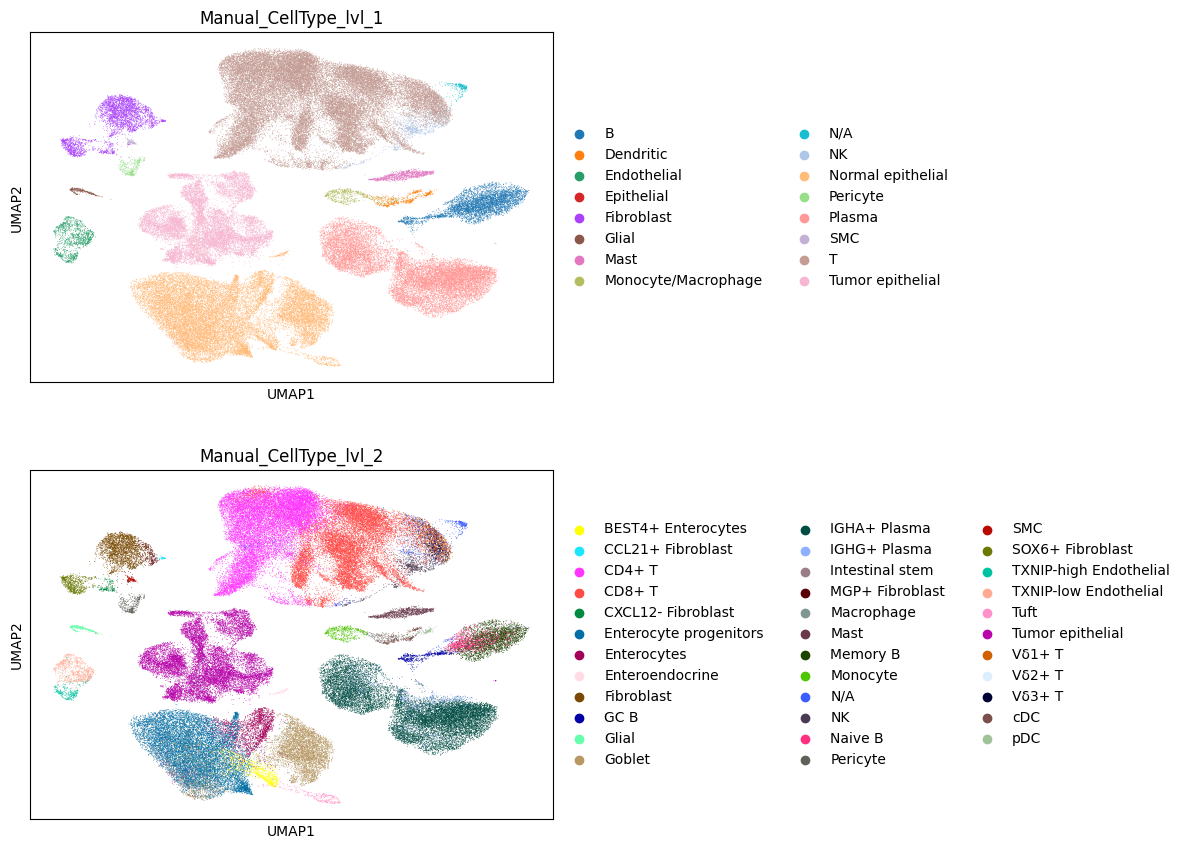

In [387]:
sc.pl.umap(adata_chen, color=['Manual_CellType_lvl_1', 'Manual_CellType_lvl_2'], ncols=1)

<Axes: xlabel='PatientID', ylabel='count'>

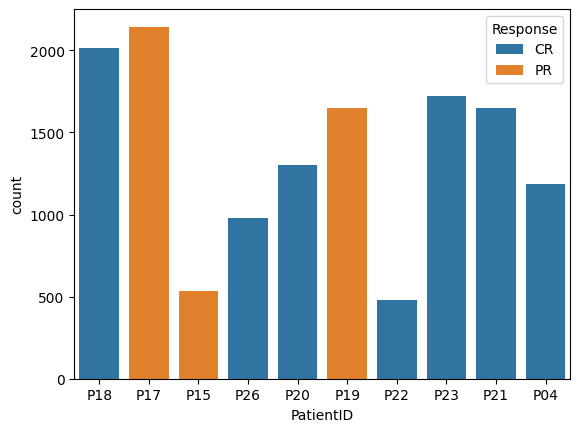

In [391]:
chen_patient_order_by_MSI_intensity     = ['P18', 'P17', 'P15', 'P26', 'P20', 'P19', 'P22', 'P23', 'P21', 'P04']
chen_patient_order_by_MSI_intensity_P18 = ['P17', 'P15', 'P26', 'P20', 'P19', 'P22', 'P23', 'P21', 'P04']
chen_patient_order_by_MSI_intensity_AC  = ['P26', 'P20', 'P21', 'P04']
chen_patient_order_by_MSI_intensity_TC  = ['P19', 'P22', 'P23',]
chen_patient_order_by_MSI_intensity_SC  = ['P18', 'P17', 'P15']

sns.countplot(data=adata_chen.obs[(adata_chen.obs['BiopsySite']=='Tumor') & 
                                      (adata_chen.obs['Manual_CellType_lvl_2']=='Tumor epithelial')], 
              x='PatientID', 
              order=chen_patient_order_by_MSI_intensity, hue='Response')

/tmp/ipykernel_297699/2472695725.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for PatientID, edf in adata_chen[adata_chen.obs['BiopsySite']=='Tumor'].obs.groupby('PatientID'):


<Axes: xlabel='PatientID', ylabel='TumorCount'>

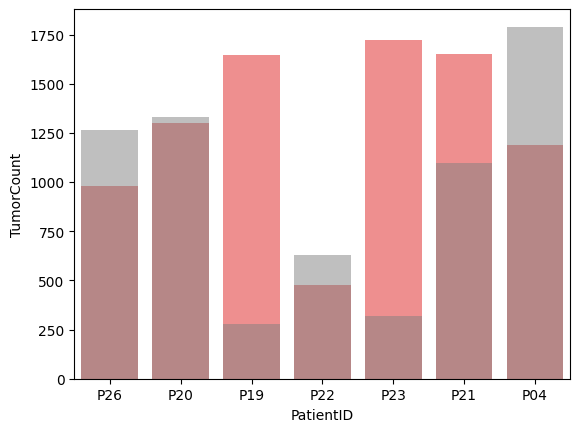

In [457]:
s = list()
for PatientID, edf in adata_chen[adata_chen.obs['BiopsySite']=='Tumor'].obs.groupby('PatientID'):
    TumorCount  = list(edf['Manual_CellType_lvl_2']).count('Tumor epithelial')
    CD8TCount   = list(edf['Manual_CellType_lvl_2']).count('CD8+ T')

    s.append( [PatientID, TumorCount, CD8TCount, CD8TCount/TumorCount] )
    
s = pd.DataFrame(s, columns=['PatientID', 'TumorCount', 'CD8TCount', 'RelativeCD8TCount'])
sns.barplot(data=s, x='PatientID', y='TumorCount', order=[ 'P26', 'P20', 'P19', 'P22', 'P23', 'P21', 'P04'], alpha=0.5, color='red')
sns.barplot(data=s, x='PatientID', y='CD8TCount', order=[ 'P26', 'P20', 'P19', 'P22', 'P23', 'P21', 'P04'], alpha=0.5, color='gray')

<Axes: xlabel='PatientID', ylabel='RelativeCD8TCount'>

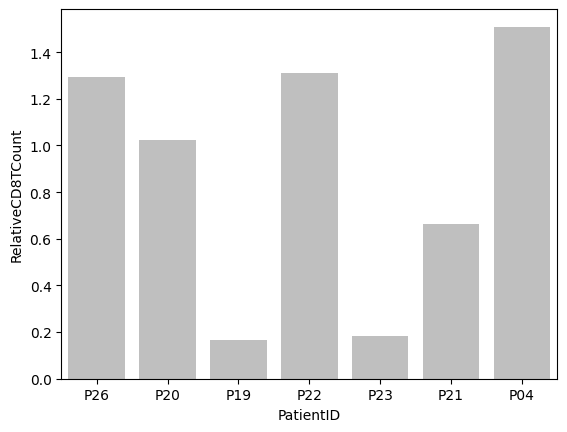

In [458]:
sns.barplot(data=s, x='PatientID', y='RelativeCD8TCount', order=[ 'P26', 'P20', 'P19', 'P22', 'P23', 'P21', 'P04'], alpha=0.5, color='gray')

In [475]:
adat_chen_T = adata_chen[(adata_chen.obs['Manual_CellType_lvl_2'].isin(['CD8+ T'])) & (adata_chen.obs['BiopsySite']=='Tumor')].copy()
sc.tl.score_genes(adat_chen_T, ['PRF1', 'GZMA', 'GZMB', 'GZMK', 'IFNG'],)

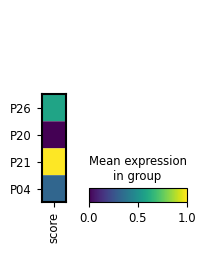

In [477]:
sc.pl.matrixplot(adat_chen_T[adat_chen_T.obs['PatientID'].isin(chen_patient_order_by_MSI_intensity_AC)], var_names='score', 
                 groupby='PatientID', 
                 categories_order=chen_patient_order_by_MSI_intensity_AC, 
                 standard_scale='var')

In [ ]:
raise ValueError

In [447]:
chen_patient_metadata = pd.read_csv('/node200data/18parkky/datasets/data/public/FASTQ/Immunotherapy_CRC_Chen_et_al/metadata/Chen_et_al.patient_meta.csv',)
chen_patient_metadata[chen_patient_metadata['Patient ID']=='P15']

Patient ID  Age Gender Cancer Type Tumor Location     TNM Tumor stage  \
10        P15   60   Male         CRC        Sigmoid  T3N+M0         III   

   dMMR/pMMR MSI/MSS POLE Mutation  TMB (Muts/Mb)  Tumor Regression Ratio  \
10      dMMR     MSI            No  Not avaliable                   0.085   

   Response TRG status Treatment Regimen  
10       PR       TRG2      Camrelizumab

In [431]:
adata_chen = adata_chen.raw.to_adata()
sc.pp.normalize_total(adata_chen)
sc.pp.log1p(adata_chen)

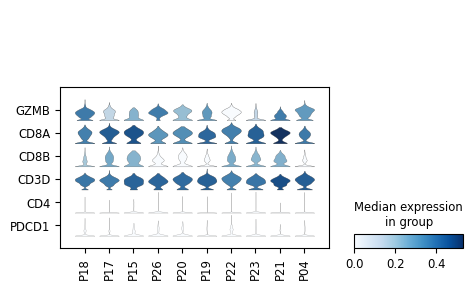

In [453]:
sc.pl.stacked_violin(adata_chen[(adata_chen.obs['Manual_CellType_lvl_2'].isin([ 'CD8+ T'])) & (adata_chen.obs['BiopsySite']=='Tumor')], 
                 var_names=['GZMB', 'CD8A', 'CD8B', 'CD3D', "CD4", 'PDCD1'], groupby='PatientID', 
                 categories_order=chen_patient_order_by_MSI_intensity, 
                 swap_axes=True, standard_scale='var', use_raw=False,)